<a href="https://colab.research.google.com/github/JuMad-SE/AlgorithmsUN2024I/blob/main/LAB4/Lab4_Grupo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cat /proc/cpuinfo

# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile APlusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Overwriting APlusB.cpp


In [ ]:
!g++ APlusB.cpp -o APlusB -std=c++11
!./APlusB

### Test input output files

In [ ]:
%%writefile input1.txt
4 8

In [ ]:
%%writefile output1.txt
12

Writing output1.txt


In [ ]:
%%writefile input2.txt
0 9

Writing input2.txt


In [ ]:
%%writefile output2.txt
9

Writing output2.txt


In [ ]:
!./APlusB < input1.txt

12

In [ ]:
!./APlusB < input2.txt

9

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt

In [ ]:
!grep -xvFf output1.txt output2.txt

9


In [ ]:
!grep -xvFf output2.txt output1.txt

12


In [ ]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

In [ ]:
!python sum.py

In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

$$ T(n) < 6 n^2 = O(n^2)$$

In [ ]:
%%writefile max_pairwise_product_full.cpp
#include <iostream>
#include <vector>
#include <algorithm>



int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int aux_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = 0; second < n; ++second) {
          if ( first != second ){
                // Not comparing a number with itself
                aux_product = numbers[first] * numbers[second]; //storing the actual product in aux_product
                if (aux_product > max_product)  max_product = aux_product; // Updates max product
          }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}

Writing max_pairwise_product_full.cpp


#### Time Complexity
$$\left. \begin{array}{llc}
 \text{INSTRUCTION} & \text{TYPE}& \text{# EXECUTIONS}\\
\text{first != second} &  \text{comparisons} &n^2 \\
\text{numbers[first] * numbers[second]}& \ \text{ products}  &n^2 - n \\
\text{max_product = aux_product} &  \text{assigments} & [1, \frac{n^2 - n}{2})  
\end{array}\right\}  =  O(n^2)$$

In [ ]:
!g++ max_pairwise_product_full.cpp -o max_pairwise_product_full
!./max_pairwise_product_full

### Test 1: Small numbers

In [ ]:
%%writefile input0.txt
10
0 0 0 0 0 0 0 0 0 0

Writing input0.txt


In [ ]:
%%writefile output0.txt
0

Writing output0.txt


In [ ]:
!./max_pairwise_product_full< input0.txt > ctest0.txt
!grep -xvFf output0.txt ctest0.txt

In [ ]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Writing input1.txt


In [ ]:
!./max_pairwise_product_full < input1.txt

90


In [ ]:
%%writefile output1.txt
90

Overwriting output1.txt


In [ ]:
!./max_pairwise_product_full< input1.txt > ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
%%writefile input2.txt
10
10 9 8 7 6 5 4 3 2 1

Writing input2.txt


In [ ]:
%%writefile output2.txt
90

Overwriting output2.txt


In [ ]:
!./max_pairwise_product_full< input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

### Test 2: largest input numbers 200000 200000 to check possible intger overflow

In [ ]:
%%writefile input3.txt
6
1 3 200000 9 200000 23

Writing input3.txt


In [ ]:
200000*200000

40000000000

In [ ]:
%%writefile output3.txt
40000000000

Writing output3.txt


In [ ]:
!./max_pairwise_product_full < input3.txt

1345294336


In [ ]:
!./max_pairwise_product_full < input3.txt > ctest3.txt
!grep -xvFf output3.txt ctest3.txt

1345294336


In [ ]:
 %%writefile run_all_test.sh
#!/bin/bash
g++ max_pairwise_product_full.cpp -o max_pairwise_product_full

#comparing all the executions to check the differences between the outputs
for i in {0..3}
do
    ./max_pairwise_product_full < input$i.txt > ctest$i.txt
    grep -xvFf output$i.txt ctest$i.txt
done

Writing run_all_test.sh


In [ ]:
!chmod u+x run_all_test.sh
!./run_all_test.sh

1345294336


### Changing the variables to long long

In [ ]:
%%writefile max_pairwise_product_long_full.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = 0; second < n; ++second) {
          if ( first != second){
                aux_product = (long long) numbers[first] * numbers[second];
                if (aux_product > max_product)  max_product = aux_product;
          }
        }
    }


    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_long_full.cpp


In [ ]:
!g++ max_pairwise_product_long_full.cpp -o max_pairwise_product_long_full

In [ ]:
!./max_pairwise_product_long_full < input3.txt

40000000000


### Runing multuple test with a bash shell

In [ ]:
 %%writefile run_all_test.sh
#!/bin/bash
g++ max_pairwise_product_long_full.cpp -o max_pairwise_product_long_full
for i in {1..3}
do
    ./max_pairwise_product_long_full < input$i.txt > ctest$i.txt
    grep -xvFf output$i.txt ctest$i.txt
done

Overwriting run_all_test.sh


In [ ]:
!chmod u+x run_all_test.sh
!./run_all_test.sh

### Test 3  stress tests, 6 testing cases files input4.txt/output4.txt .. input10.txt/output10.txt

---



Evaluating 6 testing case files, proving with negative numbers, large numbers and small numbers

In [ ]:
%%writefile input4.txt
5
100000000 300000000 400000000 500000000 600000000

Writing input4.txt


In [ ]:
500000000*600000000

300000000000000000

In [ ]:
%%writefile output4.txt
300000000000000000

Writing output4.txt


In [ ]:
%%writefile input5.txt
3
-1 2 3

Writing input5.txt


In [ ]:
%%writefile output5.txt
6

Writing output5.txt


In [ ]:
%%writefile input6.txt
6
2000 32 3 1200 5 40

Writing input6.txt


In [ ]:
2000 * 1200

2400000

In [ ]:
%%writefile output6.txt
2400000

Writing output6.txt


In [ ]:
%%writefile input7.txt
6
-2000 -2232 -2213 -121200 -1225 -1240

Writing input7.txt


In [ ]:
-2232 * -121200

270518400

In [ ]:
%%writefile output7.txt
270518400

Writing output7.txt


In [ ]:
%%writefile hello.cpp
#include <iostream>
using namespace std;

int main() {
    long long a = -200000;
    long long b = -220000;
    cout << a*b << endl;
    return 0;
}

Writing hello.cpp


In [ ]:
!g++ hello.cpp -o hello
!./hello

44000000000


In [ ]:
%%writefile input8.txt
6
0 0 0 0 0 2

Writing input8.txt


In [ ]:
0*2

0

In [ ]:
%%writefile output8.txt
0

Writing output8.txt


In [ ]:
import random
random_list = []
for i in range(5):
  random_list.append(int(random.random() * 1000000))
random_list

[470242, 812500, 738750, 508026, 668831]

In [ ]:
%%writefile input9.txt
5
370943 42092 82682 911750 759855

Writing input9.txt


In [ ]:
911750*759855

692797796250

In [ ]:
%%writefile output9.txt
692797796250

Writing output9.txt


In [ ]:
%%writefile input10.txt
4
-2 -3 -4 0

Writing input10.txt


In [ ]:
-4*-3

12

In [ ]:
%%writefile output10.txt
12

Writing output10.txt


Testing all the stress tests

In [ ]:
 %%writefile run_all_test.sh
#!/bin/bash
g++ max_pairwise_product_long_full.cpp -o max_pairwise_product_long_full
for i in {4..10}
do
    ./max_pairwise_product_long_full < input$i.txt > ctest$i.txt
    grep -xvFf output$i.txt ctest$i.txt
done

Overwriting run_all_test.sh


In [ ]:
!chmod u+x run_all_test.sh
!./run_all_test.sh

grep: output7.txt: No such file or directory
./run_all_test.sh: line 5: input8.txt: No such file or directory
grep: output8.txt: No such file or directory
./run_all_test.sh: line 5: input9.txt: No such file or directory
grep: output9.txt: No such file or directory
./run_all_test.sh: line 5: input10.txt: No such file or directory
grep: output10.txt: No such file or directory


Testing all the stress tests

### Test 4  time test  measure the execution time running with the the largest worst cases input11.txt  (200000 increasing numbers) and input12.txt (199998 increasing numbers and  200000, 200000 at the end)

In [ ]:
# input11.txt 200000 increasing numbers:  1 2 .. 200000

%%writefile WriteTest.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input11.txt");

 MyFile << 200000 <<"\n";  // n
 for (int i=1; i <200001; i++){
     MyFile << i <<" ";
 }

  // Close the file
  MyFile.close();
}

Writing WriteTest.cpp


In [ ]:
!g++ WriteTest.cpp -o WriteTest
!./WriteTest

In [ ]:
199999 * 200000

39999800000

In [ ]:
%%writefile output11.txt
39999800000

Writing output11.txt


In [ ]:
# input12.txt 200000 decreasing numbers and 200000, 199999 ...  2 1

%%writefile WriteTest.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input12.txt");

 MyFile << 200000 <<"\n";  // n
 for (int i=1; i <200001; i++){
     MyFile << 200001-i <<" ";
 }

  // Close the file
  MyFile.close();
}

Overwriting WriteTest.cpp


In [ ]:
!g++ WriteTest.cpp -o WriteTest
!./WriteTest

In [ ]:
%%writefile output12.txt
39999800000

Writing output12.txt


### Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [ ]:
!g++ max_pairwise_product_long_full.cpp -o max_pairwise_product_long_full
!time ./max_pairwise_product_long_full< input11.txt

In [ ]:
!g++ max_pairwise_product_long_full.cpp -o max_pairwise_product_long_full
!time ./max_pairwise_product_long_full< input12.txt

### Calculate the number or and upper bound to the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line.

In [ ]:
%%writefile max_pairwise_product_long_full.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //INSTRUCTIONS executed by line
    long long max_product = 0LL;                                             //1
	  long long aux_product = 0LL;                                             //1
    int n = numbers.size();                                                  //1

    for (int first = 0; first < n; ++first) {                                //2+2n
        for (int second = 0; second < n; ++second) {                         //2n + 2n**2
          if ( first != second ){                                            //n**2
                aux_product = numbers[first] * numbers[second];              //n**2 -n
                if (aux_product > max_product)                               //n**2 -n
                    max_product = aux_product;                               //[0, n**2/2 - n/2] upper bound
          }
        }
    }

                                                                             // --------------
    return max_product;                                                      // 5 + 2*n + [5*n**2, 11*n**2/2  - n/2]  upper bound
}

int main() {                                              //INSTRUCTIONS executed by line
    int n;                                                //1
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //2 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 5 + 2*n + [5*n**2, 11*n**2/2  - n/2]

    return 0;                                             // --------------
}                                                         //  11 + 6*n + [5*n**2, 11*n**2/2  - n/2]  upper bound


Overwriting max_pairwise_product_long_full.cpp


### Count executed intructions in code

In [ ]:
%%writefile max_pairwise_product_long_full_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {      //INSTRUCTIONS executed by line
    execints++;

    long long max_product = 0LL;                                                          //1
    execints++;

	  long long aux_product = 0LL;                                                          //1
    execints++;

    int n = numbers.size();                                                               //1
    execints++;

    execints++;
    for (int first = 0; first < n; ++first) {                                             //2+2n
        execints += 2;

        execints++;
        for (int second = 0; second < n; ++second) {                                       //2n + 2n**2
          execints += 2;

          execints++;
          if ( first != second ){                                                         //n**2
                aux_product = numbers[first] * numbers[second];                           //n**2 -n
                execints++;

                execints++;
                if (aux_product > max_product){                                           //n**2 -n
                    max_product = aux_product;                                            //[0,n**2/2 - n/2)  upper bound
                    execints++;

                }
        }

      }
      execints++;
    }
    execints++;
                                                                                        // --------------
    return max_product;                                                                 // 5 + 2*n + [5*n**2, 11*n**2/2  - n/2] upper bound
}

int main() {                                                 //INSTRUCTIONS executed by line

    long long execints =0LL;

    int n;                                                   //1
    execints++;

    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;

    execints++;
    for (int i = 0; i < n; ++i) {                            //2 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n

    }


    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 5 + 2*n + [5*n**2, 11*n**2/2  - n/2] upper bound

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";
    return 0;                                                // --------------
}                                                            // 11 + 6*n + [5*n**2, 11*n**2/2  - n/2]

Writing max_pairwise_product_long_full_execints.cpp


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T (n) = 11 + 6n + \left[5n^2, 11\frac{n^2}{2}  - \frac{n}{2}\right)  >  6n^2 = O(n^2)$$

It depends on the size of the lists and  the order of the list.

For the input0.txt
```
10
0 0 0 0 0 0 0 0 0 0
```
$$T = 11 + 6(10) + 5(10)^2   = 571 $$

$$T(10) \in [571, 621)  $$


In [ ]:
!g++ max_pairwise_product_long_full_execints.cpp -o max_pairwise_product_long_full_execints
!./max_pairwise_product_long_full_execints < input0.txt

571


For the input1.txt
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 11 + 6(10) + 5(10)^2 +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 601 $$

$$T(10) \in [572, 622)  $$


In [ ]:
#The number of times that  max_product = aux_product; in the worst case is less than (n**2 -n)/2 -  upper bound

#     1  2  3  4  5  6  7  8  9  10
#  1  x  2  3  4  5  6  7  8  9  10         9
#  2  2  x  6  8  10 12 14 16 18 20         5 14
#  3  3  6  x  12 15 18 21 24 27 30         4 18
#  4  4  8  12 x  20 24 28 32 36 40         3 21
#  5  5  10 15 20 x  30 35 40 45 50         2 23
#  6  6  12 18 24 30 x  42 48 54 60         2 25
#  7  7  14 21 28 35 42 x  56 63 70         2 27
#  8  8  18 27 36 45 54 63 72 x  90         1 30
#  10 10 20 30 40 50 60 70 60 90 x          0

In [ ]:
11 + 6*(10) + 5*(10)*(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0

601

In [ ]:
n = 10
print( "[", 11 + 6*n + 5*n**2,  ",", 11 + 6*n  + 5.5*n**2, ")")

[ 571 , 621.0 )


In [ ]:
!g++ max_pairwise_product_long_full_execints.cpp -o max_pairwise_product_long_full_execints
!./max_pairwise_product_long_full_execints < input1.txt

601



For the input2.txt
```
10
10 9 8 7 6 5 4 3 2 1
```
$$T = 11 + 6*(10) + 5*(10)**2 +  1  = 571 $$

In [ ]:
11 + 6*(10) + 5*(10)**2 +  1

572

In [ ]:
!g++ max_pairwise_product_long_full_execints.cpp -o max_pairwise_product_long_full_execints
!./max_pairwise_product_long_full_execints < input2.txt

572


Calculate estimated time by instruction and number of instructions by second

For the input11.txt
```
200000
1 2 ..  199999 2000
```
$$T = 11 + 6*(200000) + 5.5*(200000)**2  = 200001200012  $$

In [ ]:
!g++ max_pairwise_product_long_full_execints.cpp -o max_pairwise_product_long_full_execints
!./max_pairwise_product_long_full_execints < input11.txt

200003177092


In [ ]:
# Estimated time by instruction

295/200003177092


In [ ]:
# Estimated number of instructions by second

200003177092/295

### Estimate and verify the maximun n that can be solved in 1 second


$$(5.5n^2 + 5.5n + 11) \times 1.47*10^{-9} s = 1 s$$

$$ n \approx 11000$$


In [ ]:
# Verify input13.txt
%%writefile WriteTest.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input13.txt");

 MyFile << 11000 <<"\n";  // n
 for (int i=1; i <11001; i++){
     MyFile << i <<" ";
 }

  // Close the file
  MyFile.close();
}

Overwriting WriteTest.cpp


In [ ]:
!g++ WriteTest.cpp -o WriteTest
!./WriteTest

In [ ]:
10999 * 11000

120989000

In [ ]:
!g++ max_pairwise_product_long_full.cpp -o max_pairwise_product_long_full
!time ./max_pairwise_product_long_full< input13.txt

120989000

real	0m0.855s
user	0m0.847s
sys	0m0.002s


## Python

Max pairwise product algorithm in a list python

In [ ]:
%%writefile max_pairwise_product.py
def max_pairwise_product(numbers):
    n = len(numbers)
    max_product = 0

    for first in range(n):
        for second in range(n):
            if first != second:
                aux_product = numbers[first] * numbers[second]

                if aux_product > max_product:
                  max_product = aux_product

    return max_product

n = int(input())

numbers = [int(i) for i in input().split()]

print(max_pairwise_product(numbers))

Overwriting max_pairwise_product.py


In [ ]:
!time python3 max_pairwise_product.py < input11.txt

Traceback (most recent call last):
  File "/content/max_pairwise_product.py", line 19, in <module>
    print(max_pairwise_product(numbers))
  File "/content/max_pairwise_product.py", line 10, in max_pairwise_product
    if aux_product > max_product:
KeyboardInterrupt
^C


Python complexity time is estimated the same as the c++ solution. So now let's study it's time execution performance


the code runs for more than 1h: 30min.However, the code did not finish executing, this is because Python is much slower than C++ to carry out the instructions.
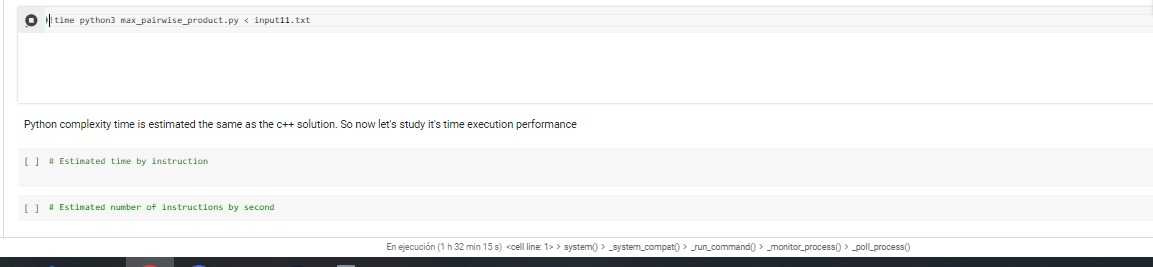

For this reason, using input 11 it was not possible to find the number of instructions per second or the delay of an execution.

# For the follwing solutions rquired  the same tests and analysis performed for the first solution

## Solutions in C++ and Python that uses
$$\frac{n^2 - n}{2} = O(n^2)\ \ \text{products}$$

In [ ]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {

            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}

In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //INSTRUCTIONS executed by line
    long long max_product = 0LL;                                             //1
	  long long aux_product = 0LL;                                             //1
    int n = numbers.size();                                                  //1

    for (int first = 0; first < n; ++first) {                                //2+2n
        for (int second = first + 1; second < n; ++second) {                 //2n + (n-1)n
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2
            if (max_product < aux_product)  {                                //(n-1)n/2
				        max_product = aux_product;                                   //[1,(n-1)n/2)  upper bound
             }
        }
    }
                                                                             // --------------
    return max_product;                                                      // 5 + 4n + [2(n-1)n+1, 2.5 (n-1)n) upper bound
}

int main() {                                              //INSTRUCTIONS executed by line
    int n;                                                //1
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //2 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 5 + 4n + [2(n-1)n+1, 2.5 (n-1)n) upper bound
    return 0;                                             // --------------
}                                                         // 11 + 7n + [2(n-1)n+1, 2.5 (n-1)n) upper bound


Writing max_pairwise_product_long.cpp


Testing all the stress tests for improved version

Stress Tests

In [ ]:
%%writefile run_all_test.sh
#!/bin/bash
g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
for i in {4..10}
do
    ./max_pairwise_product_long < input$i.txt > ctest$i.txt
    grep -xvFf output$i.txt ctest$i.txt
done

In [ ]:
!chmod u+x run_all_test.sh
!./run_all_test.sh

The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T (n) = 11 + 7n + \left[2(n-1)n+1, 2.5(n-1)n\right)= O(n^2)$$

It depends on the size of the lists and  the order of the list.

For the input0.txt
```
10
0 0 0 0 0 0 0 0 0 0
```
$$T = 11 + 7(10) + 2(9)11   = 279 $$



Calculate estimated time by instruction and number of instructions by second

For the input11.txt

200000
1 2 ..  199999 2000


In [ ]:
%%writefile max_pairwise_product_longexec.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long execints = 0LL;
long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //INSTRUCTIONS executed by line
    long long max_product = 0LL;                                             //1
	  execints+=1;
    long long aux_product = 0LL;                                             //1
    execints+=1;
    int n = numbers.size();                                                  //1
    execints+=1;
    execints+=1;
    for (int first = 0; first < n; ++first) {                                //2+2n
        execints+=2;
        execints+=1;
        for (int second = first + 1; second < n; ++second) {                 //2n + (n-1)n
			       execints+=2;
             aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2
             execints+=1;
            if (max_product < aux_product)  {                                //(n-1)n/2
				        max_product = aux_product;                                   //[1,(n-1)n/2)  upper bound
                execints+=1;
             }
        }
        execints+=1;
    }
    execints+=1;
                                                                             // --------------
    return max_product;                                                      // 5 + 4n + [2(n-1)n+1, 2.5 (n-1)n) upper bound
}

int main() {                                              //INSTRUCTIONS executed by line
    int n;  execints+=1;                                              //1
    std::cin >> n; execints+=1;                                       //1
    std::vector<int> numbers(n);                          //n
    execints+=1;
    execints+=1;
    for (int i = 0; i < n; ++i) {                         //2 + 2n
        execints+=2;
        std::cin >> numbers[i];                           //n
        execints+=1;
    }
    MaxPairwiseProduct(numbers);
    std::cout << "Número de instrucciones: " << execints << "\n";     //1 + 1  + 5 + 4n + [2(n-1)n+1, 2.5 (n-1)n) upper bound
    return 0;                                             // --------------
}                                                         // 11 + 7n + [2(n-1)n+1, 2.5 (n-1)n) upper bound


Overwriting max_pairwise_product_longexec.cpp


In [ ]:
!g++ max_pairwise_product_longexec.cpp -o max_pairwise_product_longexec
!time ./max_pairwise_product_longexec < input11.txt

Número de instrucciones: 60003772077

real	2m33.751s
user	2m32.016s
sys	0m0.042s


In [ ]:
# Estimated time by instruction (rounded values)
155/60003772077

2.583170934672171e-09

In [ ]:
# Estimated number of instructions by second
39999800000/145

275860689.6551724

It is notable that it is much faster than previous solutions and also obviously executes more instructions per second.

Python first improved Solution:

In [ ]:
%%writefile max_pairwise_product_improved.py
def max_pairwise_product_improved(numbers):
    max_product = 0
    n = len(numbers)

    for first in range(n):
        for second in range(first + 1, n):
            max_product = max(max_product, numbers[first] * numbers[second])

    return max_product

n = int(input())
numbers = [int(i) for i in input().split()]
print(max_pairwise_product_improved(numbers))

Writing max_pairwise_product_improved.py


Test with inputs 1 and 2



In [ ]:
%%writefile run_all_test.sh
#comparing all the executions to check the differences between the outputs
for i in {1..2}
do
    python3 max_pairwise_product_improved.py < input$i.txt > pythonOutput$i.txt
    grep -xvFf pythonOutput$i.txt output$i.txt
done

Overwriting run_all_test.sh


In [ ]:
!chmod u+x run_all_test.sh
!./run_all_test.sh

Test and time it with input 3

In [ ]:
!time python3 max_pairwise_product_improved.py < input3.txt > pythonOutput3.txt
!grep -xvFf pythonOutput3.txt output3.txt


real	0m0.070s
user	0m0.051s
sys	0m0.010s


20 stress tests

In [ ]:
import random

def max_pairwise_product(numbers):
    n = len(numbers)
    max_product = 0

    for first in range(n):
        for second in range(n):
            if first != second:
                aux_product = numbers[first] * numbers[second]

                if aux_product > max_product:
                  max_product = aux_product

    return max_product

def max_pairwise_product_improved(numbers):
    max_product = 0
    n = len(numbers)

    for first in range(n):
        for second in range(first + 1, n):
            max_product = max(max_product, numbers[first] * numbers[second])

    return max_product

for _ in range(20):  # Run the test 20 times
    n = random.randint(2, 12)  # Use a large n
    numbers = [random.randint(1, 10**9) for _ in range(n)]  # Generate n random numbers between 1 and 10^9

    print("-------------------------------------------------")
    print(f"Testing with the list: {numbers}")
    print(f"The efficient solution gives the result {max_pairwise_product_improved(numbers)}")
    print(f"The comparison solution gives the result {max_pairwise_product(numbers)}")
    if max_pairwise_product_improved(numbers) == max_pairwise_product(numbers):
        print("The solution is correct OK")
    else:
        print("ERROR")
    print("-------------------------------------------------")

-------------------------------------------------
Testing with the list: [185424677, 371410846, 57374093]
The efficient solution gives the result 68868736153846742
The comparison solution gives the result 68868736153846742
The solution is correct OK
-------------------------------------------------
-------------------------------------------------
Testing with the list: [153050411, 708526017, 922823983, 629210713, 842879757, 634887769, 493132092, 741222712, 193411866]
The efficient solution gives the result 777829654544812131
The comparison solution gives the result 777829654544812131
The solution is correct OK
-------------------------------------------------
-------------------------------------------------
Testing with the list: [287932359, 40907121, 337518532]
The efficient solution gives the result 97182507124976988
The comparison solution gives the result 97182507124976988
The solution is correct OK
-------------------------------------------------
-------------------------------

Count executed instructions in code and verify with inputs 1,2 and 3


In [ ]:
%%writefile max_pairwise_product_improved_count.py
import math
exec_times = 0

def max_pairwise_product_improved(numbers):
    global exec_times
    exec_times += 1
    max_product = 0

    exec_times += 1
    n = len(numbers)

    exec_times += 1
    for first in range(n):
        exec_times += 2

        exec_times += 1
        for second in range(first + 1, n):
            exec_times += 2
            max_product = max(max_product, numbers[first] * numbers[second])
        exec_times += 1
    exec_times += 1

    return max_product

exec_times += 1
n = int(input())

exec_times += n
numbers = [int(i) for i in input().split()]

exec_times += 1
max_pairwise_product_improved(numbers)
print("Number of instructions: ", exec_times)

Overwriting max_pairwise_product_improved_count.py


In [ ]:
%%writefile run_all_test.sh
for i in {1..3}
do
    echo "Input #$i"
    python3 max_pairwise_product_improved_count.py < input$i.txt
done

Overwriting run_all_test.sh


In [ ]:
!chmod u+x run_all_test.sh
!./run_all_test.sh

Input #1
Number of instructions:  146
Input #2
Number of instructions:  146
Input #3
Number of instructions:  66


# Calculate estimated time by instruction and number of instructions by second

# Using input11

Calculating operations

In [ ]:
import math

def max_pairwise_product_improved(numbers):
    max_product = 0 # 1
    n = len(numbers) # 1


    for first in range(n): # 2n + 2
        for second in range(first + 1, n): # 2n + (n-1)n
            max_product = max(max_product, numbers[first] * numbers[second]) # n^2

    return max_product

n = int(input()) # 1
numbers = [int(i) for i in input().split()] # n
max_pairwise_product_improved(numbers)


The # of operation is given by

$$T (n) = 2n^2 + 4n + 5 = O(n^2)$$

Using input11 (n=20000)

$$T (20000) = 2*20000^2 + 4 * 20000 + 5 ≈ 800080005$$

Calculating time

In [ ]:
!time python3 max_pairwise_product_improved.py < input11.txt > pythonOutputSort11.txt
!grep -xvFf pythonOutput11.txt output11.txt

Traceback (most recent call last):
  File "/content/max_pairwise_product_improved.py", line 13, in <module>
    print(max_pairwise_product_improved(numbers))
  File "/content/max_pairwise_product_improved.py", line 7, in max_pairwise_product_improved
    max_product = max(max_product, numbers[first] * numbers[second])
KeyboardInterrupt
^C


Python complexity time is estimated the same as the c++ solution. So now let's study it's time execution performance

The code runs for more than 1h: 30min.However, the code did not finish executing, this is because Python is much slower than C++ to carry out the instructions.

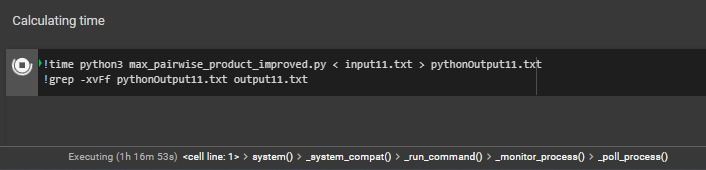

For this reason, using input 11 it was not possible to find the number of instructions per second or the delay of an execution.

# Sort solution in C++ and Python

$$ O(n \lg n)$$

**Which sorting algorithm is used in GCC?**
https://stackoverflow.com/questions/7221257/which-sorting-algorithm-is-used-in-gcc

* ...  the algorithm is called introsort, a combination between Insertionsort, Quicksort & Heapsort. ...

**Introsort**
https://en.wikipedia.org/wiki/Introsort

Introsort or introspective sort is a hybrid sorting algorithm that provides both fast average performance and (asymptotically) optimal worst-case performance. It begins with quicksort, it switches to heapsort when the recursion depth exceeds a level based on (the logarithm of) the number of elements being sorted and it switches to insertion sort when the number of elements is below some threshold

*   Class	Sorting algorithm
*   Data structure	Array
*   Worst-case performance	$O(n \lg n)$
*   Average performance	$O(n \lg n)$

**Tinsort**
https://en.wikipedia.org/wiki/Timsort

Timsort is a hybrid, stable sorting algorithm, derived from merge sort and insertion sort, designed to perform well on many kinds of real-world data. It was implemented by Tim Peters in 2002 for use in the Python programming language.

*   Class	Sorting algorithm
*   Data structure	Array
*   Worst-case performance	$O(n \lg n)$
*   Best-case performance $O(n)$
*   Average performance	$O(n \lg n)$
*   Worst-case space complexity $O(n)$

Python sorting max pairwise product

In [ ]:
%%writefile max_pairwise_product_sort.py
def max_pairwise_product_sort(numbers):
  numbers.sort(reverse=True)
  return numbers[0] * numbers[1]

n = int(input())
numbers = [int(i) for i in input().split()]
print(max_pairwise_product_sort(numbers))

Overwriting max_pairwise_product_sort.py


Test with inputs 1 and 2



In [ ]:
%%writefile run_all_test.sh
#comparing all the executions to check the differences between the outputs
for i in {1..2}
do
    python3 max_pairwise_product_sort.py < input$i.txt > pythonOutput$i.txt
    grep -xvFf pythonOutput$i.txt output$i.txt
done

Overwriting run_all_test.sh


In [ ]:
!chmod u+x run_all_test.sh
!./run_all_test.sh

Test and time it with input 3

In [ ]:
!time python3 max_pairwise_product_sort.py < input3.txt > pythonOutput3.txt
!grep -xvFf pythonOutput3.txt output3.txt


real	0m0.040s
user	0m0.031s
sys	0m0.008s


20 stress tests

In [ ]:
import random
def max_pairwise_product_sort(numbers):
  numbers.sort(reverse=True)
  return numbers[0] * numbers[1]

for _ in range(20):  # Run the test 20 times
    n = random.randint(2, 12)  # Use a large n
    numbers = [random.randint(1, 10**9) for _ in range(n)]  # Generate n random numbers between 1 and 10^9

    print("-------------------------------------------------")
    print(f"Testing with the list: {numbers}")
    print(f"The efficient solution gives the result {max_pairwise_product_sort(numbers)}")
    print(f"The comparison solution gives the result {max_pairwise_product(numbers)}")
    if max_pairwise_product_sort(numbers) == max_pairwise_product(numbers):
        print("The solution is correct OK")
    else:
        print("ERROR")
    print("-------------------------------------------------")

-------------------------------------------------
Testing with the list: [597685597, 766079671, 216128683, 748717088, 189767204, 757656787, 687536366, 823930647, 873340336, 976552630, 674446822]
The efficient solution gives the result 852862802005883680
The comparison solution gives the result 852862802005883680
The solution is correct OK
-------------------------------------------------
-------------------------------------------------
Testing with the list: [979581057, 355803693, 124310102, 530323210, 25188516, 908573524, 485967415, 944050783]
The efficient solution gives the result 924774263872817631
The comparison solution gives the result 924774263872817631
The solution is correct OK
-------------------------------------------------
-------------------------------------------------
Testing with the list: [155059024, 825286153, 994781546, 723807813, 501647899, 429007868, 871684196, 383063727]
The efficient solution gives the result 867135352120647016
The comparison solution gives t

Count executed instructions in code and verify with inputs 1,2 and 3


In [ ]:
%%writefile max_pairwise_product_sort_count.py
import math
exec_times = 0
def max_pairwise_product_sort(numbers):
  global exec_times

  exec_times += int(len(numbers)*math.log(len(numbers))) # .sort Time complexity n*log(n)
  numbers.sort(reverse=True)

  exec_times += 1
  return numbers[0] * numbers[1]

exec_times += 1
n = int(input())

execints += n
numbers = [int(i) for i in input().split()]

exec_times += 1
max_pairwise_product_sort(numbers)
print("Number of instructions: ", exec_times)

Overwriting max_pairwise_product_sort_count.py


In [ ]:
%%writefile run_all_test.sh
for i in {1..3}
do
    echo "Input #$i"
    python3 max_pairwise_product_sort_count.py < input$i.txt
done

Overwriting run_all_test.sh


In [ ]:
!chmod u+x run_all_test.sh
!./run_all_test.sh

Input #1
Number of instructions:  27
Input #2
Number of instructions:  27
Input #3
Number of instructions:  14


# Calculate estimated time by instruction and number of instructions by second

# Using input11

Calculating operations

In [ ]:
def max_pairwise_product_sort(numbers):
  numbers.sort(reverse=True) #  [N, N * Log (N)]
  return numbers[0] * numbers[1] #  1

The # of operation is given by .sort python time complexity ( N* log N), and the return statement calculation (1)

$$T (n) = 1 + \left[n, n*log(n)\right] = O(n*log(n))$$

Using input11 (n=20000)

$$T (20000) = 1 + 20000*log(20000) ≈ 86022$$

Calculating time

In [ ]:
!time python3 max_pairwise_product_sort.py < input11.txt > pythonOutputSort11.txt
!grep -xvFf pythonOutput11.txt output11.txt


real	0m0.170s
user	0m0.127s
sys	0m0.033s


Time by instruction

In [ ]:
time_per_instruction = 0.170/86022
time_per_instruction

1.9762386366278397e-06

Number of instructions by second

In [ ]:
time_per_second = 86022/0.170
time_per_second

506011.7647058823

### Estimate and verify the maximun n that can be solved in 1 second


$$(1+ n*log(n)) \times 1.47*10^{-9} s = 1 s$$

$$ n \approx 38923600$$


C++ sorting max pairwise product

In [ ]:
%%writefile max_pairwise_product_sort.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long max_pairwise_product_sort(std::vector<int>& numbers) {
    std::sort(numbers.rbegin(), numbers.rend());
    return static_cast<long long>(numbers[0]) * numbers[1];
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << max_pairwise_product_sort(numbers) << "\n";

    return 0;
}

Overwriting max_pairwise_product_sort.cpp


Test with inputs 1 and 2



In [ ]:
%%writefile run_all_test.sh
#comparing all the executions to check the differences between the outputs
for i in {1..2}
do
    g++ max_pairwise_product_sort.cpp -o max_pairwise_product_sort
    ./max_pairwise_product_sort < input$i.txt > cppOutput$i.txt
    grep -xvFf cppOutput$i.txt output$i.txt
done

Overwriting run_all_test.sh


In [ ]:
!chmod u+x run_all_test.sh
!./run_all_test.sh

Test and time it with input 3

In [ ]:
!time ./max_pairwise_product_sort < input3.txt > cppOutput3.txt
!grep -xvFf cppOutput3.txt output3.txt


real	0m0.005s
user	0m0.001s
sys	0m0.002s


20 stress tests

In [ ]:
%%writefile stressTestCPlusPlusSort.cpp

#include <iostream>
#include <vector>
#include <algorithm>
#include <random>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = 0; second < n; ++second) {
          if ( first != second){
                aux_product = (long long) numbers[first] * numbers[second];
                if (aux_product > max_product)  max_product = aux_product;
          }
        }
    }


    return max_product;
}

long long max_pairwise_product_sort(std::vector<int>& numbers) {
    std::sort(numbers.rbegin(), numbers.rend());
    return static_cast<long long>(numbers[0]) * numbers[1];
}

int main() {
    std::random_device rd;
    std::mt19937 gen(rd());

    for (int i = 0; i < 20; ++i) {
        int n = std::uniform_int_distribution<int>(2, 12)(gen);  // Use a large n
        std::vector<int> numbers(n);
        for (int j = 0; j < n; ++j) {
            numbers[j] = std::uniform_int_distribution<int>(1, 1e9)(gen);  // Generate n random numbers between 1 and 10^9
        }

        std::cout << "-------------------------------------------------\n";
        std::cout << "Testing with the list: ";
        for (int num : numbers) {
            std::cout << num << " ";
        }
        std::cout << "\n";

        long long efficient_result = max_pairwise_product_sort(numbers);
        long long comparison_result = MaxPairwiseProduct(numbers);  // Replace with your comparison function result

        std::cout << "The efficient solution gives the result " << efficient_result << "\n";
        std::cout << "The comparison solution gives the result " << comparison_result << "\n";

        if (efficient_result == comparison_result) {
            std::cout << "The solution is correct OK\n";
        } else {
            std::cout << "ERROR\n";
        }

        std::cout << "-------------------------------------------------\n";
    }

    return 0;
}


Overwriting stressTestCPlusPlusSort.cpp


In [ ]:
!g++ stressTestCPlusPlusSort.cpp -o max_pairwise_product_long
!./max_pairwise_product_long

-------------------------------------------------
Testing with the list: 683425515 928735097 526915087 442263252 
The efficient solution gives the result 634721261965799955
The comparison solution gives the result 634721261965799955
The solution is correct OK
-------------------------------------------------
-------------------------------------------------
Testing with the list: 645555604 376668876 921706127 798137129 729144043 698191485 184477678 69492693 
The efficient solution gives the result 735647881985489383
The comparison solution gives the result 735647881985489383
The solution is correct OK
-------------------------------------------------
-------------------------------------------------
Testing with the list: 598632821 911488006 604433359 662933164 
The efficient solution gives the result 604255627765630984
The comparison solution gives the result 604255627765630984
The solution is correct OK
-------------------------------------------------
-------------------------------

Count executed instructions in code and verify with inputs 1,2 and 3


In [ ]:
%%writefile max_pairwise_product_sort.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <math.h>       /* log10 */

long long execints = 0LL;
int n;

long long max_pairwise_product_sort(std::vector<int>& numbers) {
    execints += n + log10(n);
    std::sort(numbers.rbegin(), numbers.rend());
    execints += 1;
    return static_cast<long long>(numbers[0]) * numbers[1];
}

int main() {
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

     max_pairwise_product_sort(numbers);

    std::cout << execints << "\n";

    return 0;
}

Overwriting max_pairwise_product_sort.cpp


In [ ]:
%%writefile run_all_test.sh
#!/bin/bash
g++ max_pairwise_product_sort.cpp -o max_pairwise_product_sort
for i in {1..3}
do
    echo "Input #$i"
    ./max_pairwise_product_sort < input$i.txt
done

Overwriting run_all_test.sh


In [ ]:
!chmod u+x run_all_test.sh
!./run_all_test.sh

Input #1
12
Input #2
12
Input #3
7


# Calculate estimated time by instruction and number of instructions by second

# Using input11

Calculating operations

In [ ]:
%%writefile max_pairwise_product_sort.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long max_pairwise_product_sort(std::vector<int>& numbers) {
    std::sort(numbers.rbegin(), numbers.rend()); // N * log(N)
    return static_cast<long long>(numbers[0]) * numbers[1]; // 1
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << max_pairwise_product_sort(numbers) << "\n";

    return 0;
}

Overwriting max_pairwise_product_sort.cpp


The # of operation is given by .sort python time complexity ( N* log N), and the return statement calculation (1)

$$T (n) = 1 + \left[n, n*log(n)\right] = O(n*log(n))$$

Using input11 (n=20000)

$$T (20000) = 1 + 20000*log(20000) ≈ 86022$$

Calculating time

In [ ]:
!g++ max_pairwise_product_sort.cpp -o max_pairwise_product_sort
!time ./max_pairwise_product_sort < input11.txt > cppOutput11.txt
!grep -xvFf cppOutput11.txt output11.txt


real	0m0.208s
user	0m0.202s
sys	0m0.002s


Time by instruction

In [ ]:
time_per_instruction = 0.208/86022
time_per_instruction

2.4179860965799448e-06

Number of instructions by second

In [ ]:
time_per_second = 86022/0.208
time_per_second

413567.3076923077

### Estimate and verify the maximun n that can be solved in 1 second


$$(1+ n*log(n)) \times 1.47*10^{-9} s = 1 s$$

$$ n \approx 38923600$$


## Efficient solution with largest and second-largest in an list, array or vector in C++ and Python

 $$T(n) < 10 n  = O(n)$$





Add in each line a coment with the number of intstrcution that are executed in that line

#Python

In [ ]:
%%writefile efficientSolution.py
def efficientSolution(numbers):
    largest = 0
    secondLargest = 0
    for i in numbers:
        if i > largest:
            secondLargest = largest
            largest = i
        elif i > secondLargest:
            secondLargest = i

    result= secondLargest * largest
    return result

n = int(input())
numbers = [int(i) for i in input().split()]
print(efficientSolution(numbers))

Overwriting efficientSolution.py


Test with inputs 1 and 2



In [ ]:
!python3 efficientSolution.py < input1.txt
!python3 efficientSolution.py < input2.txt

90
90


Test and time it with input 3

In [ ]:
!time python3 efficientSolution.py < input3.txt

40000000000

real	0m0.043s
user	0m0.034s
sys	0m0.009s


20 stress tests

In [ ]:
import random
def efficientSolution(numbers):
    largest = 0
    secondLargest = 0
    for i in numbers:
        if i > largest:
            secondLargest = largest
            largest = i
        elif i > secondLargest:
            secondLargest = i

    return secondLargest * largest

def max_pairwise_product(numbers):
    max_product = 0
    n = len(numbers)

    for first in range(n):
        for second in range(n):
            if first != second:
                aux_product = numbers[first] * numbers[second]
                if aux_product > max_product:
                    max_product = aux_product

    return max_product

for _ in range(20):  # Run the test 10 times
    n = random.randint(1, 12)  # Use a large n
    numbers = [random.randint(1, 10**9) for _ in range(n)]  # Generate n random numbers between 1 and 10^9

    print("-------------------------------------------------")
    print(f"Testing with the list: {numbers}")
    print(f"The efficient solution gives the result {efficientSolution(numbers)}")
    print(f"The comparison solution gives the result {max_pairwise_product(numbers)}")
    if efficientSolution(numbers) == max_pairwise_product(numbers):
        print("The solution is correct OK")
    else:
        print("ERROR")
    print("-------------------------------------------------")




-------------------------------------------------
Testing with the list: [657170002, 970336222, 325022964, 610170849, 428290383, 119545029, 741084730]
The efficient solution gives the result 719101357090090060
The comparison solution gives the result 719101357090090060
The solution is correct OK
-------------------------------------------------
-------------------------------------------------
Testing with the list: [328472186, 747294308, 151253064, 944163334, 498964735, 194468594, 426176254]
The efficient solution gives the result 705567885320502872
The comparison solution gives the result 705567885320502872
The solution is correct OK
-------------------------------------------------
-------------------------------------------------
Testing with the list: [136823958, 962683266, 867926360, 265182994]
The efficient solution gives the result 835538182892291760
The comparison solution gives the result 835538182892291760
The solution is correct OK
------------------------------------------

Count executed instructions in code and verify with inputs 1,2 and 3


In [ ]:
%%writefile efficientSolutionexcec.py
exceintspy= 0
def efficientSolution(numbers):
    global exceintspy
    largest = 0
    exceintspy+=1
    secondLargest = 0
    exceintspy+=1
    exceintspy+=1
    for i in numbers:
        exceintspy+=2
        exceintspy+=1
        if i > largest:
            secondLargest = largest
            exceintspy+=1
            largest = i
            exceintspy+=1
        elif i > secondLargest:
            secondLargest = i
            exceintspy+=1
    exceintspy+=1
    result= secondLargest * largest
    exceintspy+=2 # multiplciation instruction
    return result

n = int(input())
exceintspy+=1
numbers = [int(i) for i in input().split()]
exceintspy+=n
print(efficientSolution(numbers))
exceintspy+=1
print(f"Execution Times: {exceintspy}")

Overwriting efficientSolutionexcec.py


In [ ]:
%%writefile run_all_test.sh
for i in {1..3}
do
    echo "Input #$i"
    python3 efficientSolutionexcec.py < input$i.txt
done

Overwriting run_all_test.sh


In [ ]:
!chmod u+x run_all_test.sh
!./run_all_test.sh

Input #1
90
Execution Times: 68
Input #2
90
Execution Times: 51
Input #3
40000000000
Execution Times: 40


Calculate estimated time by instruction and number of instructions by second

In [ ]:

!time python3 efficientSolutionexcec.py< input11.txt > ptest.txt
!grep -xvFf output11.txt ptest.txt



real	0m0.186s
user	0m0.153s
sys	0m0.030s
Execution Times: 1200008


In [ ]:
# Estimated time by instruction
0.192/1200008

1.599989333404444e-07

In [ ]:
# Estimated number of instructions by second
1200008/0.192

6250041.666666667

### Estimate and verify the maximun n that can be solved in 1 second

In [ ]:
%%writefile efficientSolution.py
def efficientSolution(numbers):
    largest = 0                     #1
    secondLargest = 0               #1
    for i in numbers:               #2+2n
        if i > largest:
            secondLargest = largest
            largest = i
        elif i > secondLargest:
            secondLargest = i
    #WORST CASE 3n
    result= secondLargest * largest    #3
    return result

n = int(input())                            #1
numbers = [int(i) for i in input().split()] #n
print(efficientSolution(numbers))           #1

##The number of instructions executed by the algooirithm with a list of size $n$

$$T(n) = (6n+7) = O(n) $$


By calculating the number of instructions that can be executed on input11 we obtain
$$T(n) = (6(200000)+7) = 1200007 $$

Maximum n that can be solve in 1 s
$$(6n+7) \times 1.47*10^{-9} s = 1 s$$

$$ n \approx 113378684$$

#C++

In [ ]:
%%writefile efficientSolutionC.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long efficientSolution(std::vector<long long>& numbers) {
    long long largest = 0;
    long long secondLargest = 0;
    for (long long i : numbers) {
        if (i > largest) {
            secondLargest = largest;
            largest = i;
        } else if (i > secondLargest) {
            secondLargest = i;
        }
    }
    return secondLargest * largest;
}

int main() {
    long long n;
    std::cin >> n;
    std::vector<long long> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }
    std::cout << efficientSolution(numbers) << std::endl;
    return 0;
}

Overwriting efficientSolutionC.cpp


Test with inputs 1 and 2



In [ ]:
!g++ efficientSolutionC.cpp -o efficientSolutionC
!./efficientSolutionC< input1.txt
!./efficientSolutionC< input2.txt

90
90


Test and time it with input 3

In [ ]:
!g++ efficientSolutionC.cpp -o efficientSolutionC
!time ./efficientSolutionC< input3.txt


40000000000

real	0m0.004s
user	0m0.002s
sys	0m0.001s


20 stress tests

In [ ]:
%%writefile stressTest.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <cstdlib> // Para rand() y srand()
#include <ctime> // Para time()

long long efficientSolution(std::vector<long long>& numbers) {
    long long largest = 0;
    long long secondLargest = 0;
    for (long long i : numbers) {
        if (i > largest) {
            secondLargest = largest;
            largest = i;
        } else if (i > secondLargest) {
            secondLargest = i;
        }
    }
    return secondLargest * largest;
}

long long MaxPairwiseProduct(const std::vector<long long>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = 0; second < n; ++second) {
          if ( first != second){
                aux_product = (long long) numbers[first] * numbers[second];
                if (aux_product > max_product)  max_product = aux_product;
          }
        }
    }


    return max_product;
}


// Esta es una función de prueba de estrés
void stressTest(int maxN, int maxNumber) {
    srand(time(0)); // Inicializar la semilla del generador de números aleatorios

    for (int test = 0; test < 20; ++test) { // Ejecutar la prueba 20 veces
        int n = rand() % maxN + 1; // Generar un número aleatorio entre 1 y maxN
        std::vector<long long> numbers(n);
        for (int i = 0; i < n; ++i) {
            numbers[i] = rand() % maxNumber + 1; // Generar un número aleatorio entre 1 y maxNumber
        }

        long long efficientResult = efficientSolution(numbers);
        long long comparisonSolution = MaxPairwiseProduct(numbers);
        std::cout << "-------------------------------------------------\n";
        std::cout << "Testing with the list: [" ;
        for (long long number : numbers) {
            std::cout << number << ' ';
        }
        std::cout << "]\n";
        std::cout<<"The efficient solution gives the result " << efficientResult<< '\n';
        std::cout<<"The comparison solution gives the result " << comparisonSolution<< '\n';

        if (efficientResult == comparisonSolution) {
            std::cout << "The solution is correct OK\n";
        } else {
            std::cout << "ERROR\n";
            break;
        }
        std::cout << "-------------------------------------------------\n";
    }
}

int main() {
    stressTest(12, 1000000000); // Ejecutar la prueba de estrés con n hasta 12 y números hasta 10^9
    return 0;
}

Overwriting stressTest.cpp


In [ ]:
!g++ stressTest.cpp -o stressTest
!./stressTest

-------------------------------------------------
Testing with the list: [849746941 651229003 216994654 351365134 418339973 87809637 671493796 366065400 5256211 353994827 153383228 ]
The efficient solution gives the result 570599799051478036
The comparison solution gives the result 570599799051478036
The solution is correct OK
-------------------------------------------------
-------------------------------------------------
Testing with the list: [408765870 872856293 48784467 862822726 630356400 882887132 47219286 86228826 ]
The efficient solution gives the result 770633589174921676
The comparison solution gives the result 770633589174921676
The solution is correct OK
-------------------------------------------------
-------------------------------------------------
Testing with the list: [557219999 42650443 107539137 582157346 676968723 182032675 334267300 890824558 970552385 127541687 593087850 ]
The efficient solution gives the result 864591899383470830
The comparison solution give

Count executed instructions in code and verify with inputs 1,2 and 3


In [ ]:
%%writefile efficientSolutionCexec.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long efficientSolution(std::vector<long long>& numbers, long long& execints) {

    long long largest = 0;
    execints+=1;
    long long secondLargest = 0;
    execints+=1;
    execints+=1;
    for (long long i : numbers) {
        execints+=2;
        execints+=1;
        if (i > largest) {
            secondLargest = largest;
            execints+=1;
            largest = i;
            execints+=1;
        } else if (i > secondLargest) {
            execints+=1;
            secondLargest = i;
            execints+=1;
        }
    }
    execints+=1;
    execints+=1;
    return secondLargest * largest;
}

int main() {
    long long execints =0LL;
    long long n;
    execints+=1;
    std::cin >> n;
    execints+=1;
    std::vector<long long> numbers(n);
    execints+=1;
    execints+=1;
    for (int i = 0; i < n; ++i) {
        execints+=2;
        std::cin >> numbers[i];
        execints+=1;
    }
    efficientSolution(numbers, execints);
    execints+=1;
    execints+=1;
    std::cout << "El numero de instrucciones es: " <<  execints << "\n";
    return 0;
}

Overwriting efficientSolutionCexec.cpp


In [ ]:
 %%writefile run_all_test.sh
#!/bin/bash
g++ efficientSolutionCexec.cpp -o efficientSolutionCexec
for i in {1..3}
do
    echo "Input #$i"
    ./efficientSolutionCexec < input$i.txt
done

Overwriting run_all_test.sh


In [ ]:
!chmod u+x run_all_test.sh
!./run_all_test.sh

Input #1
El numero de instrucciones es: 91
Input #2
El numero de instrucciones es: 75
Input #3
El numero de instrucciones es: 57


Calculate estimated time by instruction and number of instructions by second

In [ ]:
!g++ efficientSolutionCexec.cpp -o efficientSolutionCexec
!time ./efficientSolutionCexec< input11.txt

El numero de instrucciones es: 1600011

real	0m0.071s
user	0m0.066s
sys	0m0.004s


In [ ]:
# Estimated time by instruction
0.071/1600011

4.437469492397239e-08

In [ ]:
# Estimated number of instructions by second
1600011/0.071

22535366.197183102

### Estimate and verify the maximun n that can be solved in 1 second

In [ ]:
%%writefile efficientSolutionC.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long efficientSolution(std::vector<long long>& numbers) {
    long long largest = 0;             //1
    long long secondLargest = 0;       //1
    for (long long i : numbers) {      //2+2n
        if (i > largest) {
            secondLargest = largest;
            largest = i;
        } else if (i > secondLargest) {
            secondLargest = i;
        }
        //WORST CASE 3n
    }
    return secondLargest * largest; //1
}

int main() {
    long long n; //1
    std::cin >> n; //1
    std::vector<long long> numbers(n); //1
    for (int i = 0; i < n; ++i) {  //2+2n
        std::cin >> numbers[i];   //n
    }
    std::cout << efficientSolution(numbers) << std::endl; //1
    return 0;
}

##The number of instructions executed by the algooirithm with a list of size $n$

$$T(n) = (8n+7) = O(n) $$

By calculating the number of instructions that can be executed on input11 we obtain
$$T(n) = (8(200000)+7) = 1600007 $$

Maximum n that can be solve in 1 s
$$(8n+7) \times 1.47*10^{-9} s = 1 s$$

$$ n \approx 85034013$$

## Super efficient solution

Whitout storing the list in memory, only stpring the largest and second largest and whitout calling a function, add in each line a coment with the number of instructions that are executed in that line

in C++ and Python


 $$T(n) < 13 n  = O(n)$$


Test with inputs 1 and 2




Test and time it with input 3

20 stress tests

Count executed instructions in code and verify with inputs 1,2 and 3

Calculate estimated time by instruction and number of instructions by second

### Super efficient solution in Python

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line

Test with inputs 1 and 2




Test and time it with input 3

20 stress tests

Count executed instructions in code and verify with inputs 1,2 and 3

Calculate estimated time by instruction and number of instructions by second

### Estimate and verify the maximun n that can be solved in 1 second

## Perform 100 randomized automated tests in C++ and Python with a porgram  compares the answers,for the same 100 random input instances, of the super efficient solution $(T(n) < 10 n = O(n))$ against the sorting solution  $(T(n)  = O(n \lg{n}))$,  if the answers are not the same stops and displays "Error" listing  the input and the two answers; if the 100 tests are completed without stoping displays "Pass".